

++++++++++++++  Random Forest
  *Bagging :
     Bootstrap Aggregation :

      Bootstrap : process of creating small data samples out of a given dataset

      Aggregation : Process of driving decision using small portions of bootstraped datasets

  Feature Selection in Random Forest:
    ++++for Classification : root of the whole features in dataset
    ++++Regression : total features divided by 3
   
   *****Ensembeling : aggregating

   ------Advantage--------
    1. Low Variance
    2. Reduce Overfitting
    3. No need for Normalization
    4. High Accuracy
    5.  Scalability
    6. Versatility (Classification & Regression )
    7. Handle Missing Data

    --------disadv-------------
    1.Complexity
    2. Computationally Expensive
    3. Biased Towards Features With Many Levels
    4. Black box Model
    5. Imbalanced Data







In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')

In [2]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
df.columns = col_names
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.describe(include='all').T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [8]:
for col in col_names:
  print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
#check for duplicates
df.duplicated().sum()

0

In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['buying']=oe.fit_transform(df[['buying']])
df['maint']=oe.fit_transform(df[['maint']])
df['doors']=oe.fit_transform(df[['doors']])
df['persons']=oe.fit_transform(df[['persons']])
df['lug_boot']=oe.fit_transform(df[['lug_boot']])
df['safety']=oe.fit_transform(df[['safety']])
df['class']=oe.fit_transform(df[['class']])



In [13]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [14]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
pred1 = clf1.predict(x_test)
pred1

array([2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 0., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 1.,
       2., 2., 1., 2., 2., 3., 0., 0., 2., 2., 1., 0., 2., 2., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 3., 2., 2.,
       0., 2., 3., 0., 2., 2., 2., 0., 2., 2., 2., 2., 3., 2., 2., 0., 2.,
       0., 2., 2., 0., 0., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 1., 2., 2., 2., 0., 2., 0., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 0., 2., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2., 2., 2., 1., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 3., 2., 3., 0., 0., 2., 3.,
       0., 2., 3., 2., 0., 0., 3., 2., 0., 2., 0., 2., 2., 0., 1., 2., 2.,
       2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 3.,
       2., 0., 2., 0., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       2., 2., 0., 3., 0.

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred1)

0.9576107899807321

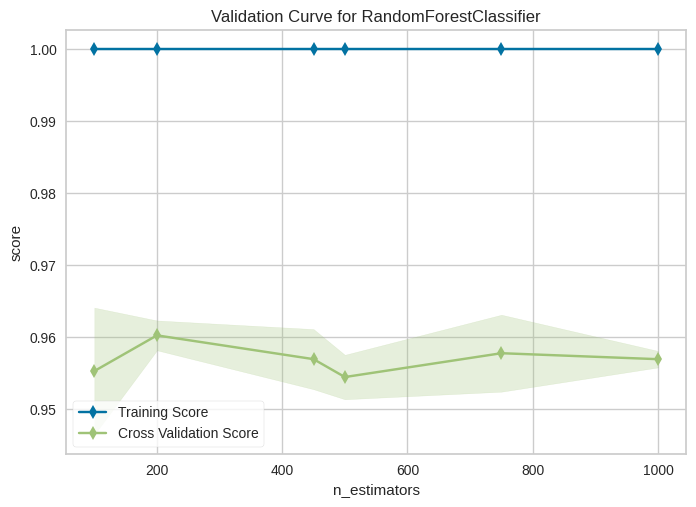

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [23]:
#Model Evaluation Visualization (Confusion Matrix, ROC-AUC Curve, Precision Recall)
from yellowbrick.model_selection import validation_curve
num_est =[100,200,450,500,750,1000]
print(validation_curve(RandomForestClassifier(),X=x_train,y=y_train,param_name='n_estimators',param_range=num_est,scoring='accuracy',cv=3))



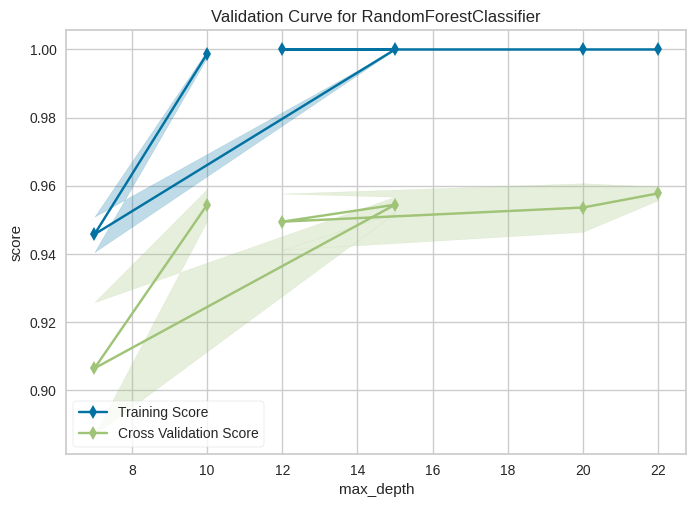

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [24]:
from yellowbrick.model_selection import validation_curve
depth_vals =[10,7,15,12,20,22]
print(validation_curve(RandomForestClassifier(),X=x_train,y=y_train,param_name='max_depth',param_range=depth_vals,scoring='accuracy',cv=3))



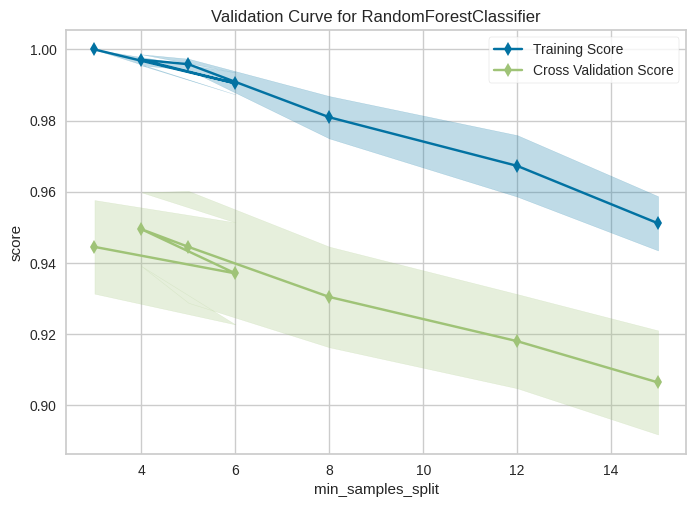

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [27]:

min_samples =[3,6,4,5,8,12,15]
print(validation_curve(RandomForestClassifier(),X=x_train,y=y_train,param_name='min_samples_split',param_range=min_samples,scoring='accuracy',cv=3))



In [28]:
clf2 = RandomForestClassifier(n_estimators=200,min_samples_split=4,max_depth=22,random_state=0)
clf2.fit(x_train,y_train)
pred2 = clf2.predict(x_test)
print(accuracy_score(y_test,pred2))

0.9518304431599229


In [29]:

feature_scores = pd.Series(clf2.feature_importances_,index=x.columns).sort_values(ascending=False)*100
print(feature_scores)

safety      29.054642
persons     23.226439
buying      18.614054
maint       14.624360
lug_boot     8.260486
doors        6.220019
dtype: float64


Text(0.5, 1.0, 'Visualizing Important Features')

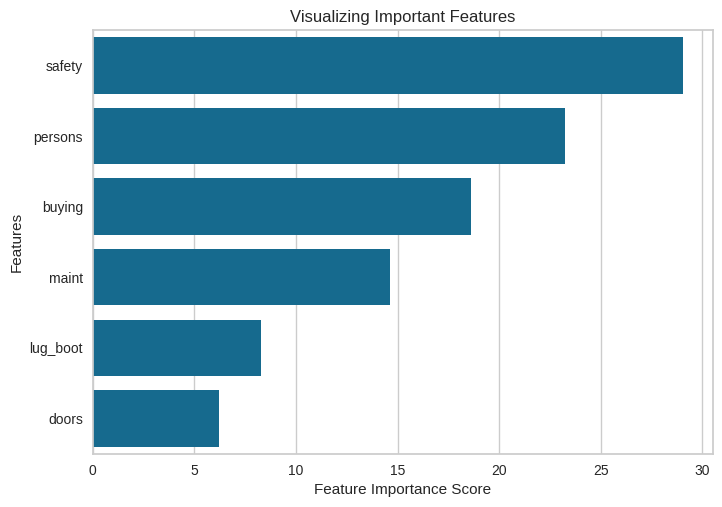

In [30]:
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [33]:
clf3 = RandomForestClassifier()
Xn = df.drop(['doors','lug_boot','maint'],axis=1)
yn = df['class']
x_train,x_test,y_train,y_test = train_test_split(Xn,yn,test_size=0.3,random_state=42)
clf3.fit(x_train,y_train)
new_pred = clf3.predict(x_test)
print(accuracy_score(y_test,new_pred))


1.0
